# Support Vector Machine

#### Build SVM model on forest fire data. Also, predict the size of the burnt area in forest fires annually.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import pickle, joblib

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"D:\360digi\DS\Sharath\SVM\handson\Datasets-SVM\forestfires.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Checking Null Values
df.isnull().sum() # no missing data

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

(array([378.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

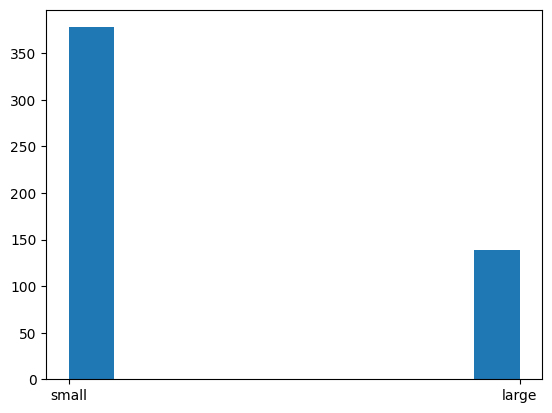

In [8]:
plt.hist(df.size_category)

# Data Preprocessing

In [9]:
X = df.iloc[:, :30]
Y = df.iloc[:, 30]

In [10]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
numeric_features = X.select_dtypes(exclude = ['object']).columns
numeric_features

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

In [12]:
categorical_features = X.select_dtypes(include = ['object']).columns
categorical_features

Index(['month', 'day'], dtype='object')

In [13]:
df['month'].unique() #12

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [14]:
df['day'].unique() #7

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

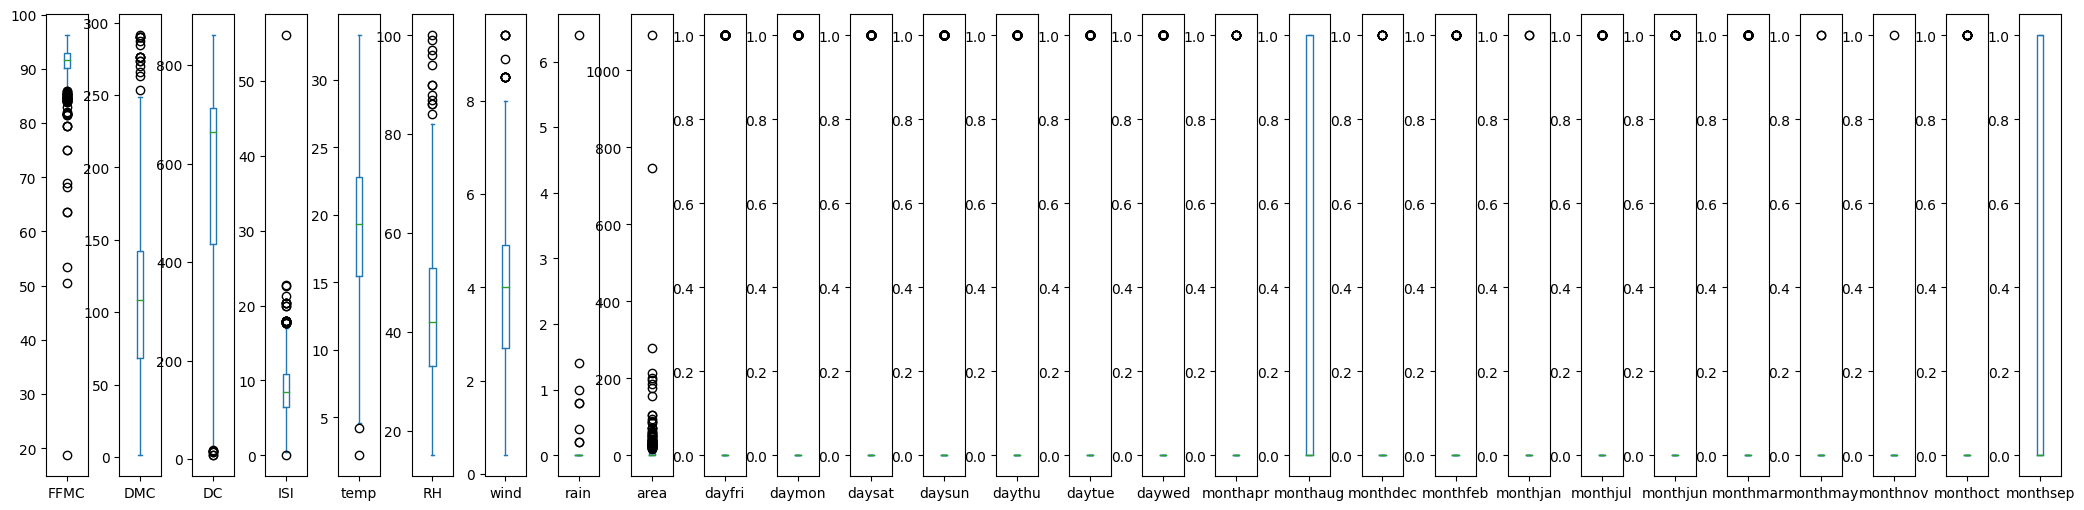

In [15]:
#Box plot visualization to view the outliers.
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (26, 6))

plt.subplots_adjust(wspace = 0.75)
plt.show()

In [ ]:
# Input columns ['rain', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct'] have low variation for method 'iqr'. 

In [16]:
# Winsorization for "FFMC" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['FFMC'])

X['FFMC'] = winsor.fit_transform(X[['FFMC']])

In [17]:
# Winsorization for "DMC" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['DMC'])

X['DMC'] = winsor.fit_transform(X[['DMC']])

In [18]:
# Winsorization for "DC" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['DC'])

X['DC'] = winsor.fit_transform(X[['DC']])

In [19]:
# Winsorization for "ISI" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['ISI'])

X['ISI'] = winsor.fit_transform(X[['ISI']])

In [20]:
# Winsorization for "temp" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['temp'])

X['temp'] = winsor.fit_transform(X[['temp']])

In [21]:
# Winsorization for "RH" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['RH'])

X['RH'] = winsor.fit_transform(X[['RH']])

In [22]:
# Winsorization for "wind" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['wind'])

X['wind'] = winsor.fit_transform(X[['wind']])

In [23]:
# Winsorization for "area" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['area'])

X['area'] = winsor.fit_transform(X[['area']])

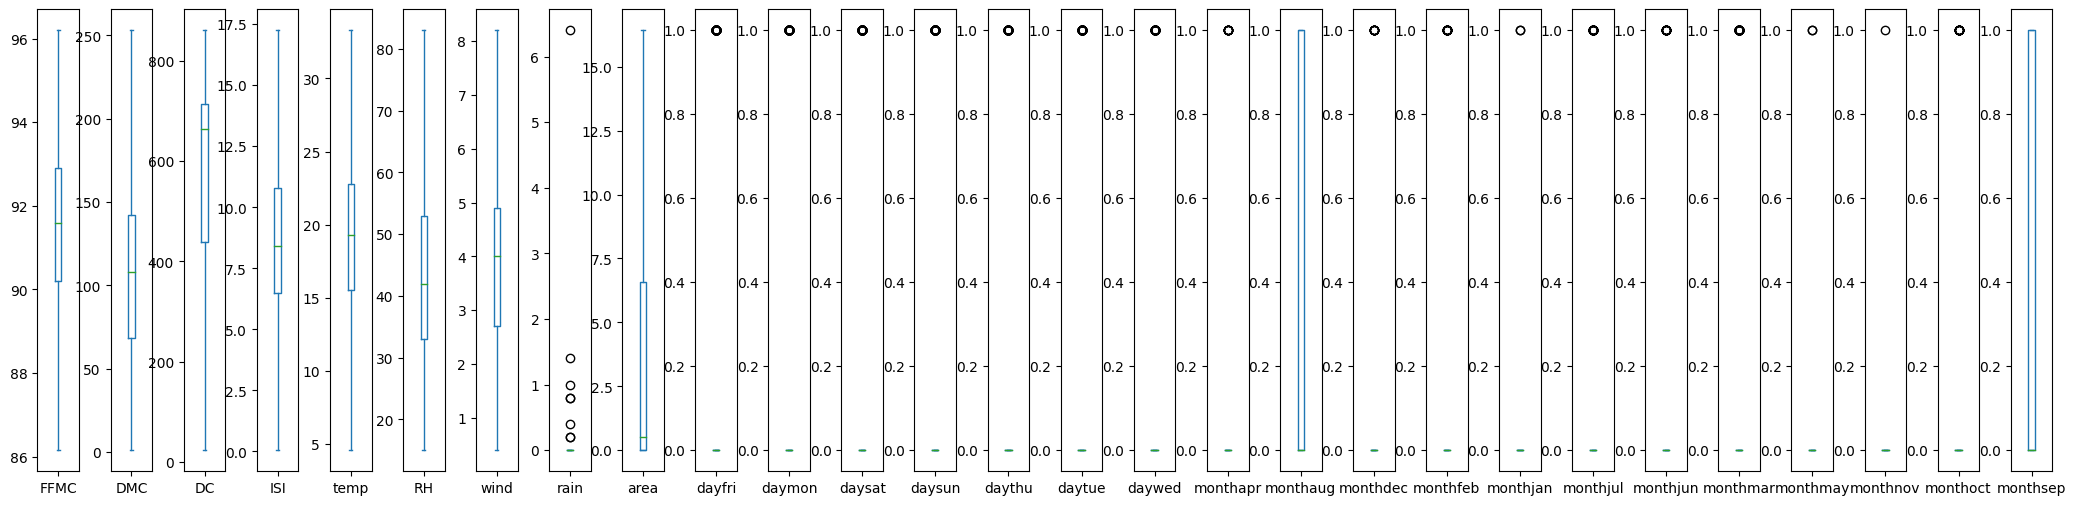

In [24]:
#Box plot visualization to view the outliers.
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (26, 6))

plt.subplots_adjust(wspace = 0.75)
plt.show()

In [25]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(X)

In [26]:
scaled_data = pd.DataFrame(scale.transform(X), columns = numeric_features)
scaled_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.512659,0.432333,0.626708,0.512775,0.498935,0.427836,0.461836,0.003385,0.246523,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,0.251105,0.245962,0.295947,0.225752,0.201487,0.231944,0.224568,0.046244,0.354200,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.402985,0.267857,0.494864,0.375000,0.380870,0.264706,0.294872,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542289,0.425397,0.765409,0.485465,0.513043,0.397059,0.461538,0.000000,0.031659,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.671642,0.560714,0.824773,0.625000,0.634783,0.558824,0.576923,0.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
## Encoding
# Categorical features
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

clean =  preprocess_pipeline.fit(X)

In [28]:
encode_data = pd.DataFrame(clean.transform(X).todense())
encode_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = clean.get_feature_names_out(input_features = X.columns)
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   categorical__month_apr  517 non-null    float64
 1   categorical__month_aug  517 non-null    float64
 2   categorical__month_dec  517 non-null    float64
 3   categorical__month_feb  517 non-null    float64
 4   categorical__month_jan  517 non-null    float64
 5   categorical__month_jul  517 non-null    float64
 6   categorical__month_jun  517 non-null    float64
 7   categorical__month_mar  517 non-null    float64
 8   categorical__month_may  517 non-null    float64
 9   categorical__month_nov  517 non-null    float64
 10  categorical__month_oct  517 non-null    float64
 11  categorical__month_sep  517 non-null    float64
 12  categorical__day_fri    517 non-null    float64
 13  categorical__day_mon    517 non-null    float64
 14  categorical__day_sat    517 non-null    fl

In [30]:
clean_data = pd.concat([scaled_data, encode_data], axis = 1) 
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FFMC                    517 non-null    float64
 1   DMC                     517 non-null    float64
 2   DC                      517 non-null    float64
 3   ISI                     517 non-null    float64
 4   temp                    517 non-null    float64
 5   RH                      517 non-null    float64
 6   wind                    517 non-null    float64
 7   rain                    517 non-null    float64
 8   area                    517 non-null    float64
 9   dayfri                  517 non-null    float64
 10  daymon                  517 non-null    float64
 11  daysat                  517 non-null    float64
 12  daysun                  517 non-null    float64
 13  daythu                  517 non-null    float64
 14  daytue                  517 non-null    fl

In [31]:
clean_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,categorical__month_nov,categorical__month_oct,categorical__month_sep,categorical__day_fri,categorical__day_mon,categorical__day_sat,categorical__day_sun,categorical__day_thu,categorical__day_tue,categorical__day_wed
0,0.004975,0.099603,0.084687,0.293605,0.126957,0.529412,0.807692,0.00000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.442786,0.136111,0.771261,0.386628,0.467826,0.264706,0.064103,0.00000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.442786,0.169048,0.792523,0.386628,0.349565,0.264706,0.115385,0.00000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.552239,0.127778,0.064620,0.520349,0.130435,1.000000,0.461538,0.03125,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.313433,0.199206,0.094123,0.555233,0.238261,1.000000,0.179487,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# Data Partition into Train and Test
train_X, test_X, train_y, test_y = train_test_split(clean_data, Y, test_size = 0.2, stratify = Y)

In [33]:
train_X.shape

(413, 47)

In [34]:
test_X.shape

(104, 47)

# Support Vector Classifier

In [35]:
# SVC with linear kernel trick
model_linear = SVC(kernel = "linear")
model1 = model_linear.fit(train_X, train_y)

In [36]:
pred_test_linear = model_linear.predict(test_X)

In [37]:
pred_test_linear

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'large', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'large',
       'small', 'large', 'large', 'large', 'small', 'small', 'large',
       'large', 'large', 'small', 'large', 'small', 'large', 'small',
       'large', 'small', 'small', 'small', 'large', 'small', 'small',
       'large', 'sma

In [38]:
# Accuracy
np.mean(pred_test_linear == test_y)

0.9711538461538461

In [ ]:
# Linear model is 97% accurate on the data.

## Hyperparameter Optimization RandomizedSearchCV

In [39]:
# Base model
model = SVC()

In [40]:
# Parameters set
parameters = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [41]:
# Randomized Search Technique for exhaustive search for best model
rand_search =  RandomizedSearchCV(model, parameters, n_iter = 10, 
                                  n_jobs = 3, cv = 3, scoring = 'accuracy', random_state = 0)

In [42]:
# Fitting the model for grid search
randomised = rand_search.fit(train_X, train_y)

In [43]:
# Best parameters
randomised.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 10}

In [44]:
# Best Model
best = randomised.best_estimator_

In [45]:
# Evaluate on Test data
pred_test = best.predict(test_X)

In [46]:
np.mean(pred_test == test_y)

0.9807692307692307

In [ ]:
# After applying hyperparameters the linear model is the best model and it is giving 98% accuarcy in segregating the data correctly.